In [14]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# # data = 'In the town of Athy one Jeremy Lanigan \nbattered away till he hadnt a pound \nhis father he died and made him a man again \nleft a farm with ten acres of ground \nhe gave a grand party for friends a relations \nwho did not forget him when come to the will \nand if youll but listen Ill make your eyes glisten \nof rows and ructions at Lanigans Ball \nsix long months I spent in Dubilin \nsix long months doing nothin at all \nsix long months I spent in Dubilin \nlearning to dance for Lanigans Ball \nI stepped out I stepped in again \nI stepped out I stepped in again\nI stepped out I stepped in again \nlearning to dance for Lanigans Ball \nMyself to be sure got free invitaions\nfor all the nice boys and girls I did ask \nin less than 10 minutes the friends and relations \nwere dancing as merry as bee round a cask \nThere was lashing of punch and wine for the ladies \npotatoes and cakes there was bacon a tay\nthere were the OShaughnessys, Murphys, Walshes, OGradys\ncourtin the girls and dancing away\nthey were doing all kinds of nonsensical polkas \nall round the room in a whirly gig \nbut Julia and I soon banished their nonsense \nand tipped them a twist of a real Irish jig \nOh how that girl got mad on me \nand danced till youd think the ceilings would fall \nfor I spent three weeks at Brooks academy \nlearning to dance for Lanigans Ball CHORUS\nThe boys were all merry the girls were all hearty \ndancing away in couples and groups \ntill an accident happened young Terrance McCarthy \nput his right leg through Miss Finertys hoops \nThe creature she fainted and cried melia murder \ncried for her brothers and gathered them all \nCarmody swore that hed go no further \ntill hed have satisfaction at Lanigans Ball \nIn the midst of the row Miss Kerrigan fainted \nher cheeks at the same time as red as a rose \nsome of the boys decreed she was painted \nshe took a wee drop too much I suppose \nHer sweetheart Ned Morgan all powerful and able \nwhen he saw his fair colleen stretched out by the wall \nhe tore the left leg from under the table \nand smashed all the dishes at Lanigans Ball CHORUS\nBoy oh Boys tis then there was ructions \nmyself got a kick from big Phelam McHugh \nbut soon I replied to this kind introduction \nand kicked up a terrible hullaballoo \nold Casey the piper was near being strangled \nthey squeezed up his pipes bellows chanters and all \nthe girls in their ribbons they all got entangled \nand that put an end to Lanigans Ball CHORUS'
# corpus = data.lower().split('\n')

In [13]:
# # copy a bunch of irish songs/rhymes
# !wget --no-check-certificate \
# https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
#     -O /Users/gveni/Documents/data/nlp_data/irish-lyrics-eof.txt

--2020-08-17 07:45:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.16, 172.217.1.208, 172.217.2.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/Users/gveni/Documents/data/nlp_data/irish-lyrics-eof.txt’

/Users/gveni/Docume 100%[===================>]  67.35K  --.-KB/s    in 0.04s   

2020-08-17 07:45:18 (1.61 MB/s) - ‘/Users/gveni/Documents/data/nlp_data/irish-lyrics-eof.txt’ saved [68970/68970]



In [15]:
data = '/Users/gveni/Documents/data/nlp_data/irish-lyrics-eof.txt'
corpus = data.lower().split('\n')

# Text encoding

In [3]:
tokenizer = Tokenizer()  # create tokenizer instance
tokenizer.fit_on_texts(corpus)  # Encode corpus by creating a dictionary 
word_index = tokenizer.word_index  # return dictionary of corpus with keys as words and values as tokens
total_words = len(word_index) + 1  # add 1 to account for OOV

print(word_index)
print('Total number of words in corpus:', total_words)

{'the': 1, 'and': 2, 'a': 3, 'i': 4, 'in': 5, 'all': 6, 'of': 7, 'for': 8, 'to': 9, 'lanigans': 10, 'ball': 11, 'at': 12, 'stepped': 13, 'he': 14, 'were': 15, 'was': 16, 'till': 17, 'his': 18, 'again': 19, 'out': 20, 'got': 21, 'boys': 22, 'girls': 23, 'as': 24, 'there': 25, 'away': 26, 'but': 27, 'six': 28, 'long': 29, 'months': 30, 'spent': 31, 'learning': 32, 'dance': 33, 'dancing': 34, 'they': 35, 'that': 36, 'chorus': 37, 'she': 38, 'her': 39, 'him': 40, 'left': 41, 'friends': 42, 'relations': 43, 'did': 44, 'when': 45, 'ructions': 46, 'dubilin': 47, 'doing': 48, 'myself': 49, 'merry': 50, 'round': 51, 'soon': 52, 'their': 53, 'them': 54, 'oh': 55, 'an': 56, 'put': 57, 'leg': 58, 'miss': 59, 'fainted': 60, 'cried': 61, 'hed': 62, 'from': 63, 'up': 64, 'town': 65, 'athy': 66, 'one': 67, 'jeremy': 68, 'lanigan': 69, 'battered': 70, 'hadnt': 71, 'pound': 72, 'father': 73, 'died': 74, 'made': 75, 'man': 76, 'farm': 77, 'with': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'gra

In [4]:
# Create all possible ngrams of corpus by extracting every possible word combinations
input_sequences = []
for line in corpus:
    word_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(word_list)):
        ngram_sequence = word_list[:i+1]
        input_sequences.append(ngram_sequence)
        
# Count max sequence length and pad input sequences to keep them of equal length
max_seqlen = max([len(x) for x in input_sequences])
padded_sequences = np.array(pad_sequences(input_sequences, maxlen = max_seqlen, padding='pre')) 

# QC pad_sequences
padded_sequences[10]

array([ 0,  0,  0,  0,  0,  0, 70, 26, 17, 14, 71], dtype=int32)

# Create data and labels

In [5]:
# Create input sequences and corresponding predictions (labels) for training 
Xs, labels = padded_sequences[:,:-1], padded_sequences[:,-1]
print(Xs[10], labels[10])

# Convert labels to one-hot 
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[ 0  0  0  0  0  0 70 26 17 14] 71


# Model development

In [6]:
# build model using LSTM
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_seqlen-1))
model1.add(tf.keras.layers.LSTM(20))
model1.add(tf.keras.layers.Dense(total_words, activation='softmax'))

# compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model1.summary()

# train model
history_model1 = model1.fit(Xs, ys, epochs=300, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 64)            15232     
_________________________________________________________________
lstm (LSTM)                  (None, 20)                6800      
_________________________________________________________________
dense (Dense)                (None, 238)               4998      
Total params: 27,030
Trainable params: 27,030
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
13/13 [==============================] - 0s 8ms/step - loss: 5.4714 - acc: 0.0075
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 5.4593 - acc: 0.0526
Epoch 3/300
13/13 [==============================] - 0s 6ms/step - loss: 5.4434 - acc: 0.0551
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 5.4039 - acc: 0.0376
Epoch 

13/13 [==============================] - 0s 5ms/step - loss: 3.0422 - acc: 0.3860
Epoch 80/300
13/13 [==============================] - 0s 5ms/step - loss: 3.0186 - acc: 0.3910
Epoch 81/300
13/13 [==============================] - 0s 5ms/step - loss: 2.9969 - acc: 0.3860
Epoch 82/300
13/13 [==============================] - 0s 5ms/step - loss: 2.9740 - acc: 0.4010
Epoch 83/300
13/13 [==============================] - 0s 5ms/step - loss: 2.9503 - acc: 0.4060
Epoch 84/300
13/13 [==============================] - 0s 5ms/step - loss: 2.9272 - acc: 0.4060
Epoch 85/300
13/13 [==============================] - 0s 5ms/step - loss: 2.9061 - acc: 0.4035
Epoch 86/300
13/13 [==============================] - 0s 5ms/step - loss: 2.8797 - acc: 0.4135
Epoch 87/300
13/13 [==============================] - 0s 5ms/step - loss: 2.8592 - acc: 0.4211
Epoch 88/300
13/13 [==============================] - 0s 5ms/step - loss: 2.8374 - acc: 0.4311
Epoch 89/300
13/13 [==============================] - 0s 5ms/st

13/13 [==============================] - 0s 5ms/step - loss: 1.5244 - acc: 0.7393
Epoch 165/300
13/13 [==============================] - 0s 5ms/step - loss: 1.5100 - acc: 0.7544
Epoch 166/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4992 - acc: 0.7544
Epoch 167/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4855 - acc: 0.7569
Epoch 168/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4721 - acc: 0.7569
Epoch 169/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4586 - acc: 0.7719
Epoch 170/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4473 - acc: 0.7744
Epoch 171/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4347 - acc: 0.7794
Epoch 172/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4244 - acc: 0.7769
Epoch 173/300
13/13 [==============================] - 0s 5ms/step - loss: 1.4113 - acc: 0.7794
Epoch 174/300
13/13 [==============================] -

13/13 [==============================] - 0s 6ms/step - loss: 0.7546 - acc: 0.9048
Epoch 250/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7485 - acc: 0.9048
Epoch 251/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7424 - acc: 0.9023
Epoch 252/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7367 - acc: 0.9098
Epoch 253/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7309 - acc: 0.9073
Epoch 254/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7252 - acc: 0.9098
Epoch 255/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7197 - acc: 0.9148
Epoch 256/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7146 - acc: 0.9173
Epoch 257/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7090 - acc: 0.9173
Epoch 258/300
13/13 [==============================] - 0s 5ms/step - loss: 0.7034 - acc: 0.9198
Epoch 259/300
13/13 [==============================] -

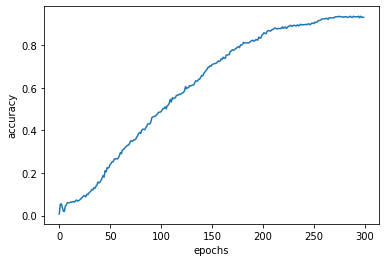

In [7]:
import matplotlib.pyplot as plt

plt.plot(history_model1.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# Prediction stage

In [8]:
# Predict next word progressively

seed_text = 'laurence spent in dublin'
next_words = 10

for _ in range(next_words):
    testword_list = tokenizer.texts_to_sequences([seed_text])[0] # tokenize text to a dictionary
    testword_list = pad_sequences([testword_list], maxlen=max_seqlen-1, padding='pre')
    print(testword_list)
    # Note: maxlen is one word shorter to match training sequence length
    predicted = model1.predict_classes(testword_list, verbose=0)
    
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted:  # Note: if predicted label matches index, extract corresponding word and break
            output_word = word
            break
    seed_text += ' ' + output_word
print(seed_text)

[[ 0  0  0  0  0  0  0  0 31  5]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[ 0  0  0  0  0  0  0 31  5  1]]
[[  0   0   0   0   0   0  31   5   1 178]]
[[  0   0   0   0   0  31   5   1 178   7]]
[[  0   0   0   0  31   5   1 178   7   1]]
[[  0   0   0  31   5   1 178   7   1 179]]
[[  0   0  31   5   1 178   7   1 179 180]]
[[  0  31   5   1 178   7   1 179 180  60]]
[[ 31   5   1 178   7   1 179 180  60  96]]
[[  5   1 178   7   1 179 180  60  96 154]]
laurence spent in dublin the midst of the row kerrigan fainted eyes hearty me


In [9]:
# build model using bidirectinoal LSTM
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(total_words, 64, input_length=max_seqlen-1))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model2.add(tf.keras.layers.Dense(total_words, 'softmax'))

# compile model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# fit model
history_model2 = model2.fit(Xs, ys, epochs = 300, verbose = 1)

Epoch 1/300
13/13 [==============================] - 0s 8ms/step - loss: 5.4685 - acc: 0.0251
Epoch 2/300
13/13 [==============================] - 0s 7ms/step - loss: 5.4469 - acc: 0.0677
Epoch 3/300
13/13 [==============================] - 0s 7ms/step - loss: 5.4082 - acc: 0.0501
Epoch 4/300
13/13 [==============================] - 0s 7ms/step - loss: 5.3165 - acc: 0.0476
Epoch 5/300
13/13 [==============================] - 0s 7ms/step - loss: 5.1682 - acc: 0.0476
Epoch 6/300
13/13 [==============================] - 0s 7ms/step - loss: 5.0734 - acc: 0.0476
Epoch 7/300
13/13 [==============================] - 0s 7ms/step - loss: 5.0229 - acc: 0.0476
Epoch 8/300
13/13 [==============================] - 0s 7ms/step - loss: 4.9780 - acc: 0.0501
Epoch 9/300
13/13 [==============================] - 0s 7ms/step - loss: 4.9332 - acc: 0.0501
Epoch 10/300
13/13 [==============================] - 0s 7ms/step - loss: 4.8886 - acc: 0.0526
Epoch 11/300
13/13 [==============================] - 0s 7m

Epoch 87/300
13/13 [==============================] - 0s 7ms/step - loss: 1.7131 - acc: 0.7068
Epoch 88/300
13/13 [==============================] - 0s 8ms/step - loss: 1.6929 - acc: 0.7093
Epoch 89/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6715 - acc: 0.7168
Epoch 90/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6675 - acc: 0.7143
Epoch 91/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6549 - acc: 0.7268
Epoch 92/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6390 - acc: 0.7243
Epoch 93/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6250 - acc: 0.7444
Epoch 94/300
13/13 [==============================] - 0s 7ms/step - loss: 1.6120 - acc: 0.7494
Epoch 95/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5826 - acc: 0.7494
Epoch 96/300
13/13 [==============================] - 0s 7ms/step - loss: 1.5446 - acc: 0.7619
Epoch 97/300
13/13 [==============================

13/13 [==============================] - 0s 7ms/step - loss: 0.6483 - acc: 0.9273
Epoch 173/300
13/13 [==============================] - 0s 8ms/step - loss: 0.6414 - acc: 0.9273
Epoch 174/300
13/13 [==============================] - 0s 7ms/step - loss: 0.6352 - acc: 0.9323
Epoch 175/300
13/13 [==============================] - 0s 7ms/step - loss: 0.6276 - acc: 0.9273
Epoch 176/300
13/13 [==============================] - 0s 7ms/step - loss: 0.6204 - acc: 0.9348
Epoch 177/300
13/13 [==============================] - 0s 7ms/step - loss: 0.6145 - acc: 0.9273
Epoch 178/300
13/13 [==============================] - 0s 8ms/step - loss: 0.6090 - acc: 0.9273
Epoch 179/300
13/13 [==============================] - 0s 8ms/step - loss: 0.6032 - acc: 0.9273
Epoch 180/300
13/13 [==============================] - 0s 8ms/step - loss: 0.5963 - acc: 0.9298
Epoch 181/300
13/13 [==============================] - 0s 8ms/step - loss: 0.5900 - acc: 0.9348
Epoch 182/300
13/13 [==============================] -

13/13 [==============================] - 0s 7ms/step - loss: 0.3388 - acc: 0.9398
Epoch 258/300
13/13 [==============================] - 0s 7ms/step - loss: 0.3301 - acc: 0.9424
Epoch 259/300
13/13 [==============================] - 0s 7ms/step - loss: 0.3172 - acc: 0.9373
Epoch 260/300
13/13 [==============================] - 0s 7ms/step - loss: 0.3094 - acc: 0.9499
Epoch 261/300
13/13 [==============================] - 0s 7ms/step - loss: 0.3051 - acc: 0.9474
Epoch 262/300
13/13 [==============================] - 0s 7ms/step - loss: 0.3012 - acc: 0.9449
Epoch 263/300
13/13 [==============================] - 0s 7ms/step - loss: 0.2985 - acc: 0.9449
Epoch 264/300
13/13 [==============================] - 0s 7ms/step - loss: 0.2964 - acc: 0.9449
Epoch 265/300
13/13 [==============================] - 0s 7ms/step - loss: 0.2928 - acc: 0.9449
Epoch 266/300
13/13 [==============================] - 0s 7ms/step - loss: 0.2914 - acc: 0.9474
Epoch 267/300
13/13 [==============================] -

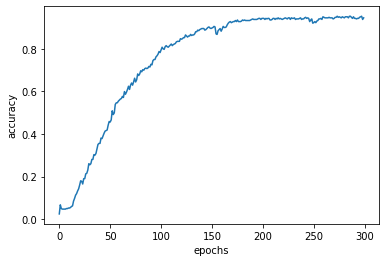

In [10]:
plt.plot(history_model2.history['acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [11]:
# predict next 10 words given seed_text using bidirectional LSTM
seed_text = 'laurence spent in dublin'

for _ in range(next_words):
    textword_list = tokenizer.texts_to_sequences([seed_text])[0]
    textword_list = pad_sequences([textword_list], maxlen=max_seqlen-1, padding='pre')
    print(textword_list)
    predicted = model2.predict_classes(textword_list, verbose=0)
    
    output_word = ''
    for word, index in tokenizer.word_index.items():
        if predicted == index:
            output_word = word
            break
    seed_text += ' '+output_word
print(seed_text)        

[[ 0  0  0  0  0  0  0  0 31  5]]
[[ 0  0  0  0  0  0  0 31  5  7]]
[[ 0  0  0  0  0  0 31  5  7  1]]
[[  0   0   0   0   0  31   5   7   1 202]]
[[  0   0   0   0  31   5   7   1 202   3]]
[[  0   0   0  31   5   7   1 202   3 130]]
[[  0   0  31   5   7   1 202   3 130 208]]
[[  0  31   5   7   1 202   3 130 208  69]]
[[ 31   5   7   1 202   3 130 208  69 205]]
[[  5   7   1 202   3 130 208  69 205 216]]
laurence spent in dublin of the colleen a gig table lanigan wall phelam spent
